In [31]:
from random import choices
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
import matplotlib.animation as animation

In [2]:
data = pd.read_csv("classification/dataset.csv")
data = data.drop(["Unnamed: 0","presenceP"],axis=1)
data

,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presence
0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,56879,Oui,1
1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,19184,Oui,1
2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,56879,Oui,1
3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,19184,Oui,1
4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,139936,Non,0
...,...,...,...,...,...,...,...,...,...,...,...
215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,25251,Oui,1
215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,19184,Oui,1
215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,56879,Oui,0
215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,56879,Oui,0


In [107]:
import random
def Bruit(nb):
    return random.randint(0, 1)

In [25]:
Bruit(5)

1

In [137]:
for i in range(216000):
    if data["Event"][i]=="Normal":
        if (i%15 == 0):
            data["presence"][i] = Bruit(data["presence"][i])

<ipython-input-137-a03be8660d18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["presence"][i] = Bruit(data["presence"][i])


In [3]:
data

,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presence
0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,56879,Oui,1
1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,19184,Oui,1
2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,56879,Oui,1
3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,19184,Oui,1
4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,139936,Non,0
...,...,...,...,...,...,...,...,...,...,...,...
215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,25251,Oui,1
215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,19184,Oui,1
215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,56879,Oui,0
215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,56879,Oui,0


In [4]:
ListDate = data['date']

In [140]:
data = data.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

In [5]:
data = data.drop(["idRestaurant", "date", "Type" , "idEtudiant"],axis=1)

In [141]:
data.to_csv("classification/dataset.csv")

In [6]:
data["Plat"].replace(["Lentilles","Loubia","Riz","Spaghetti","Couscous","Weekend"],[0,1,2,3,4,5],inplace=True)
data["meteo"].replace(["Ensoleillé","Nuageux","Mauvais"],[0,1,2],inplace=True)
data["Event"].replace(["Normal","Weekend", "Jour férié","Ramadan"],[0,1,2,3],inplace=True)
data["Heberg"].replace(["interne","externe"],[0,1],inplace=True)
data["Bourse"].replace(["Oui","Non"],[0,1],inplace=True)

In [234]:
#data = data.drop(["idRestaurant", "date", "Type" , "idEtudiant", "presenceP",],axis=1)
trainC = data[:144000]
testC = data[144001:]
Ytrain = trainC["presence"]
Xtrain = trainC.drop(["presence"], axis=1)
Ytest = testC["presence"]
Xtest = testC.drop(["presence"], axis=1)

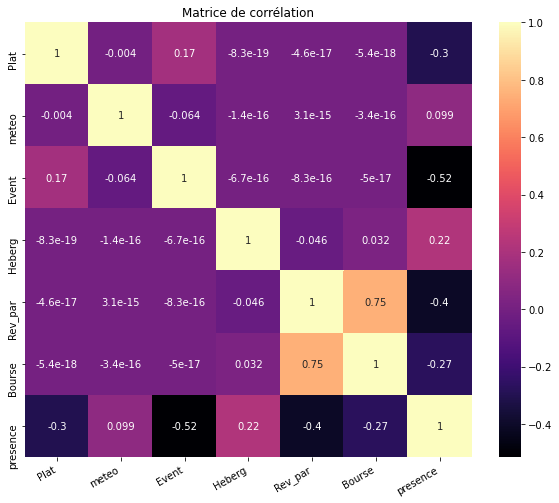

In [86]:
fig, axes = plt.subplots(figsize= (10,8))
sns.heatmap(trainC.corr(), annot=True, cmap='magma')
plt.xticks(rotation=30, ha='right')
plt.title("Matrice de corrélation")
plt.show()

In [173]:
modele_rf = RandomForestClassifier(
     n_estimators=9,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [174]:
start_time = time.perf_counter()
modele_rf.fit(Xtrain, Ytrain)
end_time = time.perf_counter()
print(end_time-start_time)

0.48646890000236453


In [167]:
pd.DataFrame(modele_rf.feature_importances_,
              index = Xtrain.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
Event,0.369878
Rev_par,0.244413
Plat,0.197539
Heberg,0.081880
Bourse,0.060863
meteo,0.045427


In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Le pourcentage de bien classés est de : {accuracy_score(Ytest, modele_rf.predict(Xtest))*100} %")

Le pourcentage de bien classés est de : 97.50690981819193 %


In [170]:
cf=confusion_matrix(Ytest, modele_rf.predict(Xtest))
pd.DataFrame((cf/np.sum(cf))*100,
             index = ["Absents", "Présents"],
             columns = ["Absents", "Présents"])

,Absents,Présents
Absents,46.046473,1.663912
Présents,0.829178,51.460437


In [93]:
# Trouvons le meuilleur nombre d'arbre dans la foret:
nbArbres = []
scoreRF = []
temps = []
for i in range (1,10):
    modele_rf = RandomForestClassifier(
     n_estimators=i,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)
    start_time = time.perf_counter()
    modele_rf.fit(Xtrain, Ytrain)
    end_time = time.perf_counter()
    nbArbres.append(i)
    scoreRF.append(accuracy_score(Ytrain, modele_rf.predict(Xtrain))*100) 
    temps.append(end_time - start_time)

In [172]:
start_time = time.perf_counter()
y_predict = modele_rf.predict(Xtest)
end_time = time.perf_counter()
print(end_time-start_time)

0.10179419999622041


In [94]:
bestT = {
  "nbArbres":nbArbres ,
  "Score": scoreRF ,
  "Temps d'exécution": temps,
}
bestRF = pd.DataFrame(bestT)

In [95]:
bestRF.head(50)

,nbArbres,Score,Temps d'exécution
0,1,97.458333,0.100871
1,2,97.458333,0.122850
2,3,97.458333,0.159971
3,4,97.458333,0.240573
4,5,97.458333,0.302016
5,6,97.458333,0.360772
6,7,97.458333,0.539861
7,8,97.458333,0.545173
8,9,97.458333,0.664135


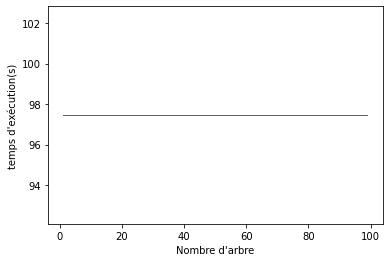

In [92]:
fig, ax = plt.subplots()
plt.xlabel("Nombre d'arbre")
plt.ylabel("temps d'exécution(s)")
x = nbArbres
y = scoreRF

ax.plot(x, y, lw=1)


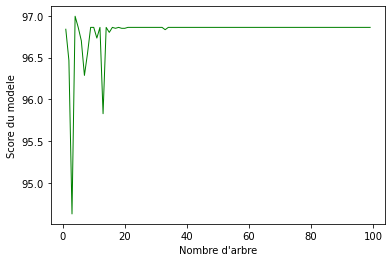

In [44]:
fig, ax = plt.subplots()
plt.xlabel("Nombre d'arbre")
plt.ylabel("Score du modele")
x = nbArbres
y = scoreRF

ax.plot(x, y, lw=1, color="green")

In [175]:
prevision = {
  "Date": ListDate[144001:],
  "Test": Ytest,
  "Prevision": modele_rf.predict(Xtest),
}
Prev = pd.DataFrame(prevision)

In [176]:
gb = Prev.groupby('Date').sum()

In [177]:
gb

,Test,Prevision
Date,,
01-01-2022,0,0
01-02-2022,150,153
01-03-2022,148,153
01-04-2022,0,0
01-05-2022,0,0
...,...,...
31-05-2022,101,105
31-07-2022,148,153
31-08-2021,102,105


In [178]:
gb.to_excel("../Rapport/RandomForestResult.xlsx")

In [265]:
Result = pd.read_excel("../Rapport/Resultats/RandomForestResult.xlsx")
Result.head(15)

,Date,Test,Prevision
0,2021-08-21,86,82
1,2021-08-22,145,153
2,2021-08-23,151,153
3,2021-08-24,107,105
4,2021-08-25,86,82
5,2021-08-26,179,186
6,2021-08-27,0,0
7,2021-08-28,85,82
8,2021-08-29,150,153
9,2021-08-30,148,153


In [182]:
Result['Date'] = pd.to_datetime(Result['Date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = Result.set_index(['Date'])

Text(0.5, 1.0, 'Répartitions des présents par date')

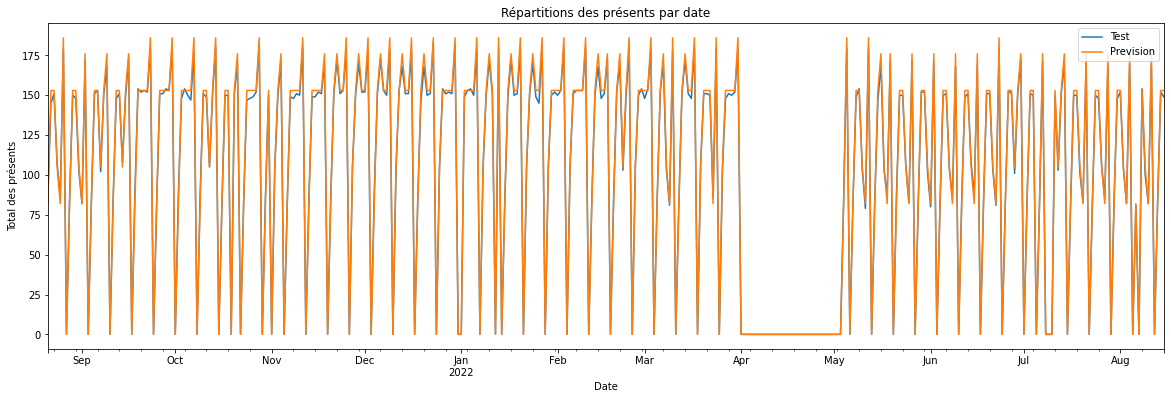

In [185]:
f,ax = plt.subplots(1,1,figsize=(20,6))
plt1=Result.set_index('Date')
plt1.plot(ax=ax)
plt.ylabel("Total des présents")
plt.title("Répartitions des présents par date")

# Regression LOGISTIQUE

In [235]:
from sklearn import linear_model
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto',max_iter=200)
#training
start_time = time.perf_counter()
modele_regLog.fit(Xtrain,Ytrain)
end_time = time.perf_counter()
#précision du modèle
precision = modele_regLog.score(Xtrain,Ytrain)
print(precision*100)
print(end_time-start_time)

47.552083333333336
0.15542139999888605


In [227]:
precision = modele_regLog.score(Xtest,Ytest)

In [228]:
print(precision)

0.8461228628175391


In [226]:
cf=confusion_matrix(Ytest, modele_regLog.predict(Xtest))
pd.DataFrame((cf/np.sum(cf))*100,
             index = ["Absents", "Présents"],
             columns = ["Absents", "Présents"])

,Absents,Présents
Absents,38.350533,9.359852
Présents,6.027861,46.261754


In [231]:
start_time = time.perf_counter()
y_predict = modele_regLog.predict(Xtest)
end_time = time.perf_counter()
print(end_time-start_time)

0.008175800001481548


In [209]:
previsionLOG = {
  "Date": ListDate[144001:],
  "Test": Ytest,
  "Prevision": modele_regLog.predict(Xtest),
}
PrevLOG = pd.DataFrame(previsionLOG)

In [210]:
RegLog = PrevLOG.groupby('Date').sum()

In [211]:
RegLog.to_excel("../Rapport/Resultats/RegLogResult.xlsx")

In [266]:
ResultLog = pd.read_excel("../Rapport/Resultats/RegLogResult.xlsx")
ResultLog.head(15)

,Date,Test,Prevision
0,2021-08-21,86,60
1,2021-08-22,145,148
2,2021-08-23,151,148
3,2021-08-24,107,129
4,2021-08-25,86,118
5,2021-08-26,179,136
6,2021-08-27,0,0
7,2021-08-28,85,60
8,2021-08-29,150,148
9,2021-08-30,148,148


Text(0, 0.5, 'Total des présents')

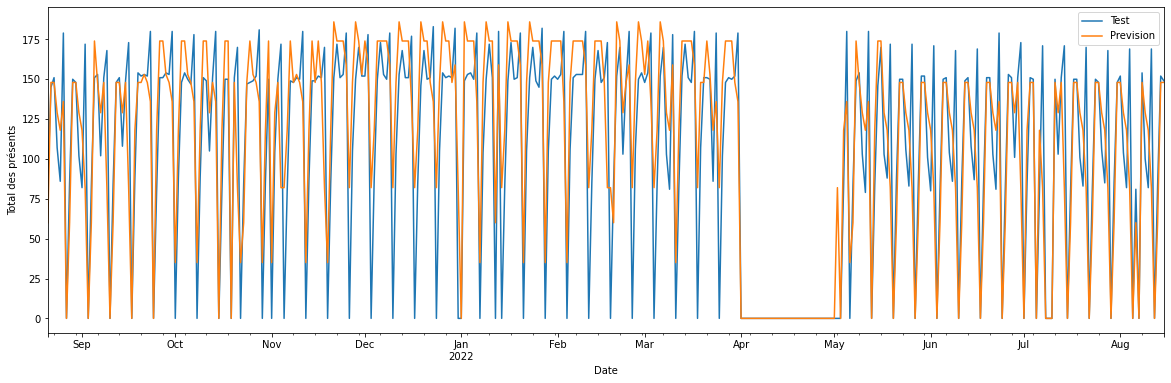

In [216]:
f,ax = plt.subplots(1,1,figsize=(20,6))
plt1=ResultLog.set_index('Date')
plt1.plot(ax=ax)
plt.ylabel("Total des présents")
#plt.title("Répartitions des présents par date")

In [149]:
ListK = []
ListScore = []
ListTemps = []
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,20):
    modelKnn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.perf_counter()
    modelKnn.fit(Xtrain, Ytrain)
    end_time = time.perf_counter()
    ListK.append(k)
    ListScore.append(accuracy_score(Ytrain, modelKnn.predict(Xtrain))*100) 
    ListTemps.append(end_time - start_time)

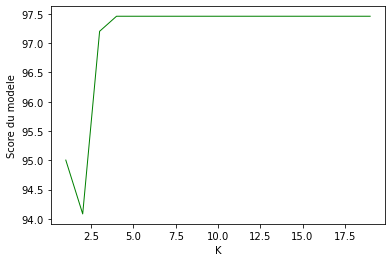

In [158]:
fig, ax = plt.subplots()
plt.xlabel("K")
plt.ylabel("Score du modele")
x = ListK
y = ListScore

ax.plot(x, y, lw=1, color= "green")

In [195]:
accuracy_score(Ytest, modelKnn.predict(Xtest))*100

97.19301656967458

In [190]:
modelKnn = KNeighborsClassifier(n_neighbors=3)
start_time = time.perf_counter()
modelKnn.fit(Xtrain, Ytrain)
end_time = time.perf_counter()
print(end_time-start_time)

8.183463400004257


In [192]:
cf=confusion_matrix(Ytest, modelKnn.predict(Xtest))
pd.DataFrame((cf/np.sum(cf))*100,
             index = ["Absents", "Présents"],
             columns = ["Absents", "Présents"])

,Absents,Présents
Absents,45.714524,1.995861
Présents,0.811122,51.478493


In [217]:
previsionKNN = {
  "Date": ListDate[144001:],
  "Test": Ytest,
  "Prevision": modelKnn.predict(Xtest),
}
PrevKNN = pd.DataFrame(previsionKNN)

In [194]:
start_time = time.perf_counter()
y_predict = modelKnn.predict(Xtest)
end_time = time.perf_counter()
print(end_time-start_time)

6.407810900003824


In [218]:
KNN = PrevKNN.groupby('Date').sum()

In [219]:
KNN.to_excel("../Rapport/Resultats/KnnResult.xlsx")

In [267]:
ResultKnn = pd.read_excel("../Rapport/Resultats/KnnResult.xlsx")
ResultKnn.head(15)

,Date,Test,Prevision
0,2021-08-21,86,82
1,2021-08-22,145,153
2,2021-08-23,151,153
3,2021-08-24,107,117
4,2021-08-25,86,82
5,2021-08-26,179,186
6,2021-08-27,0,0
7,2021-08-28,85,82
8,2021-08-29,150,153
9,2021-08-30,148,153


Text(0, 0.5, 'Total des présents')

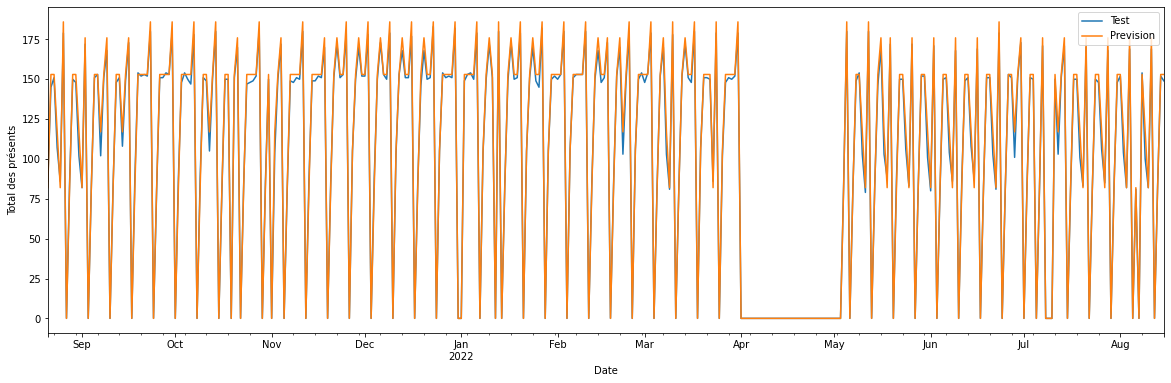

In [222]:
f,ax = plt.subplots(1,1,figsize=(20,6))
plt1=ResultKnn.set_index('Date')
plt1.plot(ax=ax)
plt.ylabel("Total des présents")
#plt.title("Répartitions des présents par date")

# Résultats Finaux

In [258]:
ResFinal = pd.read_excel("../Rapport/Resultats/AllResult.xlsx")

In [263]:
ResFinal.head(15)

,Date,Test,Arima,SARIMA,RandomForest,LogRegression,KNN
0,2021-08-22,145,122,120,153,148,153
1,2021-08-23,151,135,132,153,148,153
2,2021-08-24,107,129,127,105,129,117
3,2021-08-25,86,119,115,82,118,82
4,2021-08-26,179,123,118,186,136,186
5,2021-08-28,85,86,82,82,60,82
6,2021-08-29,150,139,136,153,148,153
7,2021-08-30,148,137,134,153,148,153
8,2021-08-31,102,103,98,105,129,117
9,2021-09-01,82,109,106,82,118,82


In [255]:
ResFinal.drop(ResFinal[ResFinal.Test==0].index, inplace=True)

In [257]:
ResFinal.to_excel("../Rapport/Resultats/ResultatsCwithOut.xlsx")

Text(0, 0.5, 'Total des présents')

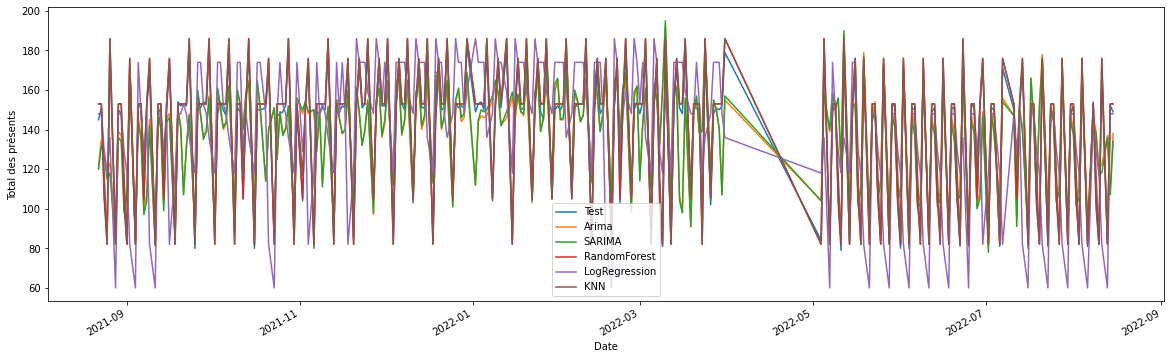

In [261]:
f,ax = plt.subplots(1,1,figsize=(20,6))
plt1=ResFinal.set_index('Date')
plt1.plot(ax=ax)
plt.ylabel("Total des présents")
#plt.title("Répartitions des présents par date")

In [2]:
dataset = pd.read_csv("classification/dataset.csv")
dataset

,Unnamed: 0,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presenceP,presence
0,0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,56879,Oui,0.525,1
1,1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,19184,Oui,0.705,1
2,2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,56879,Oui,0.600,1
3,3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,19184,Oui,0.705,1
4,4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,139936,Non,0.410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,25251,Oui,0.650,1
215996,215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,19184,Oui,0.650,1
215997,215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,56879,Oui,0.545,0
215998,215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,56879,Oui,0.545,0


In [3]:
dataset = dataset.drop(["Unnamed: 0","idRestaurant","Type","Plat","meteo","Event","idEtudiant","Heberg","Rev_par","Bourse","presenceP"],axis=1)

In [4]:
dataset

,date,presence
0,01-09-2019,1
1,01-09-2019,1
2,01-09-2019,1
3,01-09-2019,1
4,01-09-2019,0
...,...,...
215995,15-08-2022,1
215996,15-08-2022,1
215997,15-08-2022,0
215998,15-08-2022,0


In [6]:
pres = dataset.groupby('date').sum()

In [9]:
pres.to_excel("TimeSeries/dataset.xlsx")